In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./Online Sales Data.csv')
 

In [3]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [7]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [4]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [19]:
###Total_revenue_of_all_the_dataset
total_revenue = df["Total Revenue"].sum()
print(total_revenue)

80567.84999999999


In [21]:
###Total_quantity_sold_of_all_the_dataset
total_quantity_sold = df['Units Sold'].sum()
print(total_quantity_sold)

518


In [31]:
###Total_revenue_by_region
total_revenue_by_region = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print(total_revenue_by_region )

Region
North America    36844.34
Asia             22455.45
Europe           21268.06
Name: Total Revenue, dtype: float64


In [32]:
###Total_revenue_by_payment_method
Total_revenue_by_payment_method = df.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False)
print(Total_revenue_by_payment_method)

Payment Method
Credit Card    51170.86
PayPal         21268.06
Debit Card      8128.93
Name: Total Revenue, dtype: float64


In [34]:
###Total_revenue_by_category
Total_revenue_by_category = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)	
print(Total_revenue_by_category)

Product Category
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Clothing            8128.93
Beauty Products     2621.90
Books               1861.93
Name: Total Revenue, dtype: float64


In [136]:
###Total_revenue_by_month
df['month'] = pd.DatetimeIndex(df['Date']).month_name()
total_revenue_per_month = df.groupby('month')['Total Revenue'].sum().sort_values( ascending=False)
print(total_revenue_per_month)

month
January     14548.32
March       12849.24
April       12451.69
February    10803.37
May          8455.49
June         7384.55
August       7278.11
July         6797.08
Name: Total Revenue, dtype: float64


In [145]:
###Total_revenue_by_month_by_category

total_revenue_per_month_by_category = df.groupby(['month','Product Category'])['Total Revenue'].sum().sort_values(ascending=False)
total_revenue_per_month_by_category

month     Product Category
January   Electronics         7999.90
April     Electronics         6709.91
March     Home Appliances     5059.91
          Electronics         4499.90
May       Electronics         4198.96
June      Electronics         3599.93
August    Electronics         3066.96
February  Sports              2993.87
          Electronics         2899.88
          Home Appliances     2869.92
April     Sports              2559.80
January   Home Appliances     2169.94
July      Electronics         2006.97
April     Home Appliances     1989.85
May       Home Appliances     1989.82
January   Clothing            1789.84
August    Home Appliances     1668.96
July      Sports              1648.88
March     Sports              1609.84
January   Sports              1579.83
June      Home Appliances     1479.89
July      Home Appliances     1417.87
August    Sports              1408.71
June      Sports              1365.93
February  Clothing            1284.81
May       Sports       

In [70]:
### Top_products_by_sales_with_the_region
top_products_by_sales = df.groupby(['Product Name','Region'])['Units Sold'].sum().sort_values(ascending=False)
print(top_products_by_sales.head(10))

Product Name                             Region       
Hanes ComfortSoft T-Shirt                Asia             10
The Catcher in the Rye by J.D. Salinger  North America     7
Yeti Rambler Tumbler                     Asia              6
Nike Air Force 1                         Asia              6
Gap Essential Crewneck T-Shirt           Asia              6
Spalding NBA Street Basketball           Asia              6
Calvin Klein Boxer Briefs                Asia              5
Under Armour HeatGear T-Shirt            Asia              5
Forever 21 Graphic Tee                   Asia              5
Titleist Pro V1 Golf Balls               Asia              5
Name: Units Sold, dtype: int64


In [77]:
### Bottom_products_by_sales_with_the_region
Bottom_products_by_sales = df.groupby(['Product Name','Region'])['Units Sold'].sum().sort_values(ascending=False)
print(Bottom_products_by_sales.tail(10))

Product Name                                     Region       
Cuisinart Custom 14-Cup Food Processor           Europe           1
Cuisinart Griddler Deluxe                        Europe           1
Neutrogena Skincare Set                          Europe           1
Neutrogena Hydro Boost Water Gel                 Europe           1
Nespresso VertuoPlus                             Europe           1
Nespresso Vertuo Next Coffee and Espresso Maker  Europe           1
NARS Radiant Creamy Concealer                    Europe           1
Microsoft Surface Laptop 4                       North America    1
De'Longhi Magnifica Espresso Machine             Europe           1
iRobot Braava Jet M6                             Europe           1
Name: Units Sold, dtype: int64


In [75]:
### Top_products_by_revenue_with_the_region
top_products_by_revenue = df.groupby(['Product Name','Region'])['Total Revenue'].sum().sort_values(ascending=False)
print(top_products_by_revenue.head(10))

Product Name                       Region       
Canon EOS R5 Camera                North America    3899.99
LG OLED TV                         Europe           2599.98
MacBook Pro 16-inch                North America    2499.99
Apple MacBook Pro 16-inch          North America    2399.00
iPhone 14 Pro                      North America    1999.98
Peloton Bike                       Asia             1895.00
HP Spectre x360 Laptop             North America    1599.99
Roomba i7+                         Europe           1599.98
Samsung Odyssey G9 Gaming Monitor  North America    1499.99
Samsung Galaxy Tab S8              North America    1499.98
Name: Total Revenue, dtype: float64


In [76]:
### Bottom_products_by_revenue_with_the_region
Bottom_products_by_revenue = df.groupby(['Product Name','Region'])['Total Revenue'].sum().sort_values(ascending=False)
print(Bottom_products_by_revenue.tail(10))

Product Name                                 Region       
The Power of Habit by Charles Duhigg         North America    23.98
The Art of War by Sun Tzu                    North America    23.97
The Great Gatsby by F. Scott Fitzgerald      North America    21.98
Glossier Cloud Paint                         Europe           18.00
The Four Agreements by Don Miguel Ruiz       North America    17.98
Neutrogena Hydro Boost Water Gel             Europe           16.99
Biore UV Aqua Rich Watery Essence Sunscreen  Europe           15.00
The Ordinary Hyaluronic Acid Serum           Europe            6.80
The Ordinary Caffeine Solution 5% + EGCG     Europe            6.70
The Ordinary Niacinamide Serum               Europe            6.50
Name: Total Revenue, dtype: float64


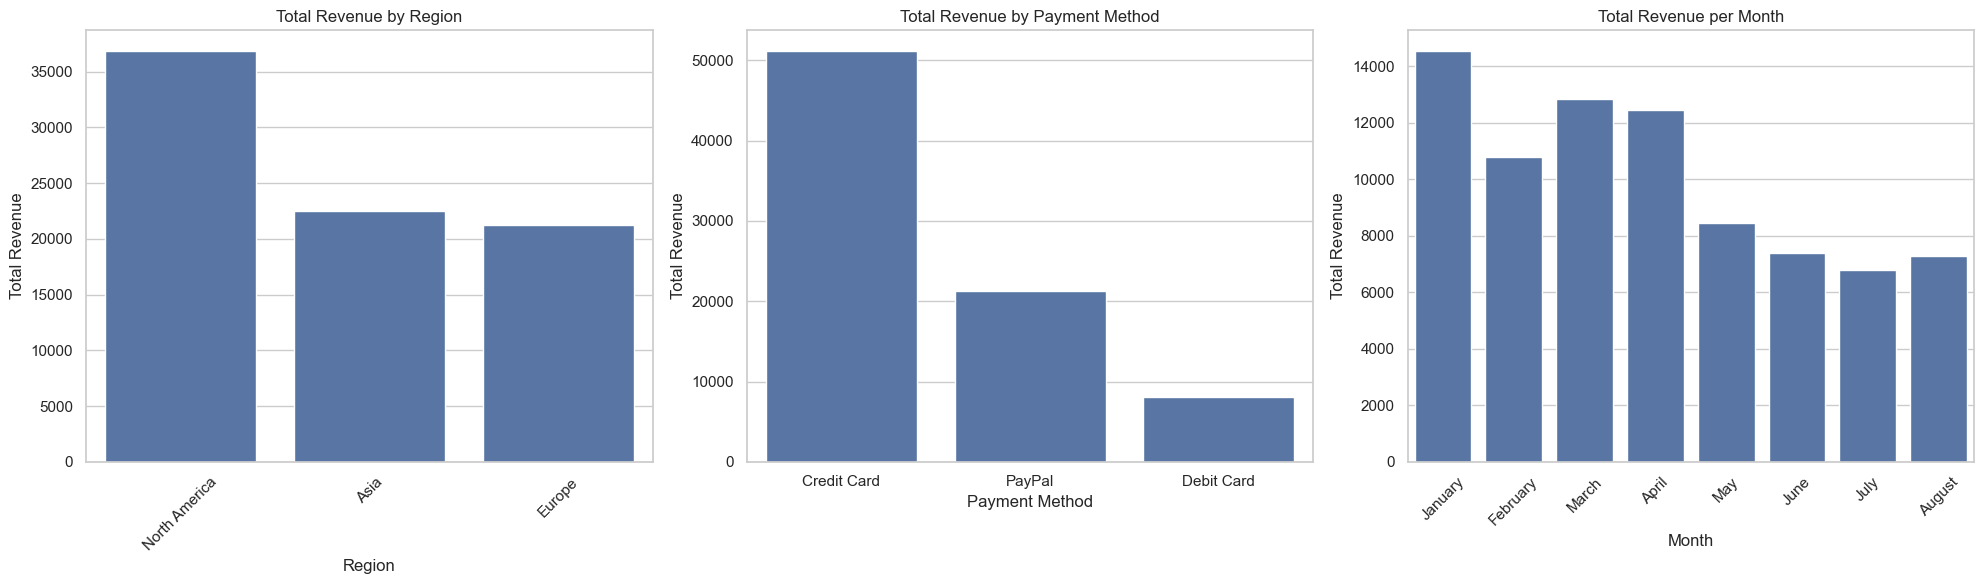

In [144]:
fig, axs = plt.subplots(1,3, figsize=(20, 6))

# Total Revenue by Region
sns.barplot(x=total_revenue_by_region.index, y=total_revenue_by_region.values, ax=axs[0])
axs[0].set_title('Total Revenue by Region')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Total Revenue')
axs[0].tick_params(axis='x', rotation=45)

# Total Revenue by Payment Method
sns.barplot(x=Total_revenue_by_payment_method.index, y=Total_revenue_by_payment_method.values, ax=axs[1])
axs[1].set_title('Total Revenue by Payment Method')
axs[1].set_xlabel('Payment Method')
axs[1].set_ylabel('Total Revenue')
axs[1].tick_params(axis='x', rotation=0)

# Total Revenue per Month
sns.barplot(x=total_revenue_per_month.index.get_level_values('month'), y=total_revenue_per_month.values, ax=axs[2], order=df['month'])
axs[2].set_title('Total Revenue per Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Total Revenue')
axs[2].tick_params(axis='x', rotation=45)

#Total_reveneu_by_category

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

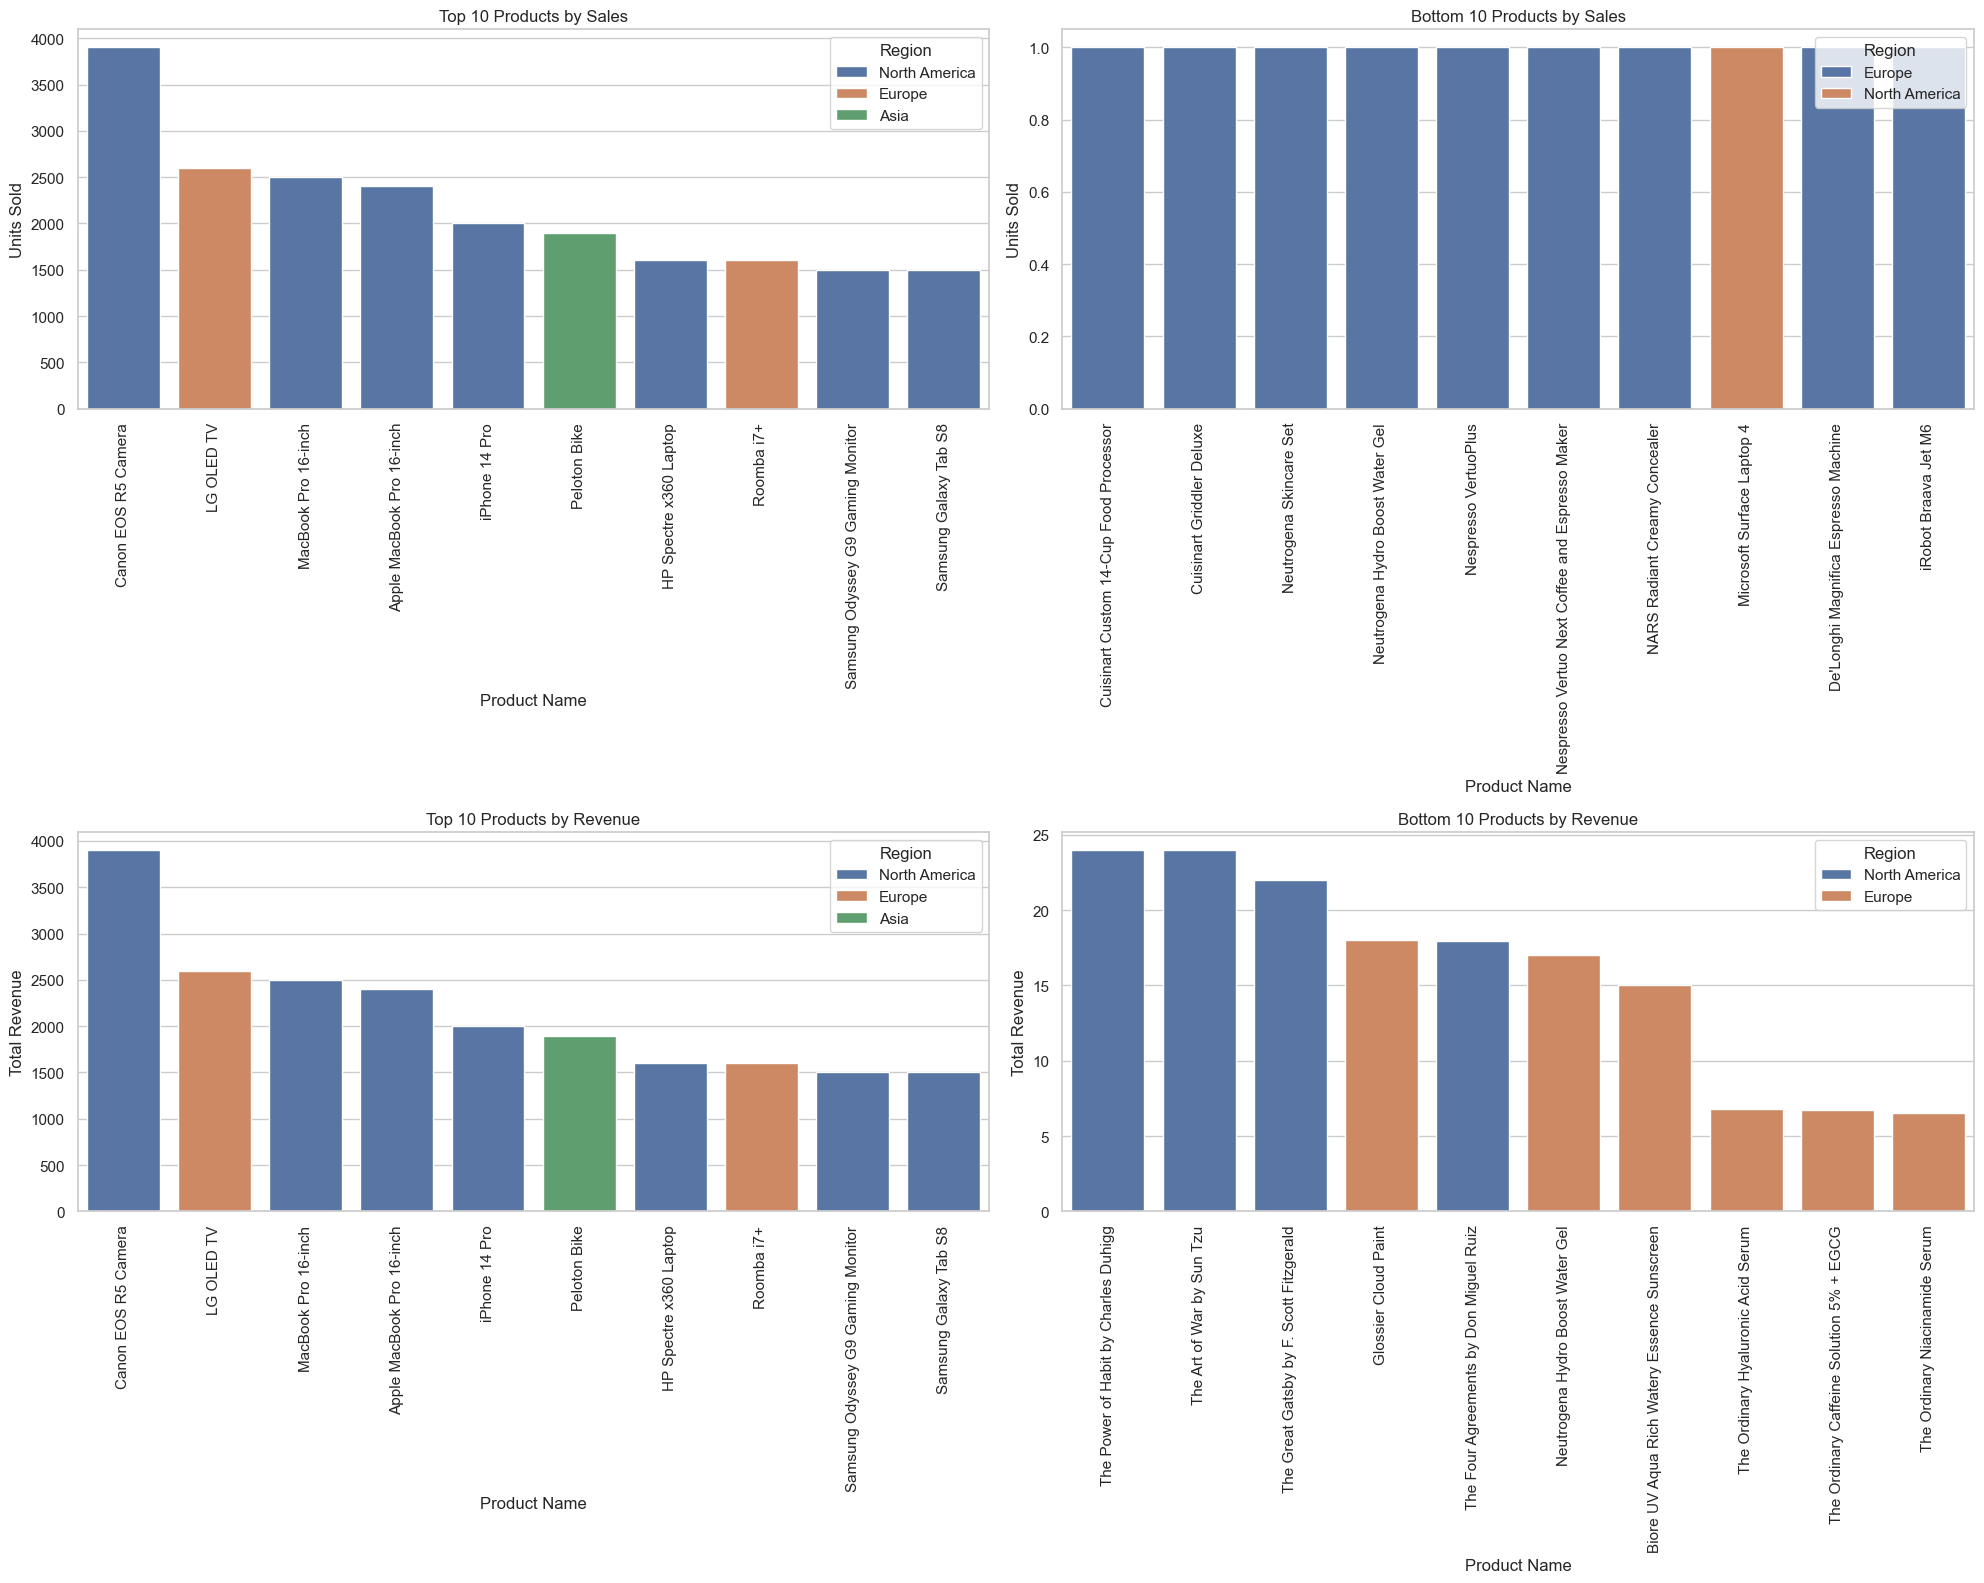

In [159]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Top Products by Sales
sns.barplot(x=top_products_by_sales.head(10).index.get_level_values('Product Name'), 
            y=top_products_by_sales.head(10).values, 
            hue=top_products_by_sales.head(10).index.get_level_values('Region'),
            ax=axs[0,0])
axs[0,0].set_title('Top 10 Products by Sales')
axs[0,0].set_xlabel('Product Name')
axs[0,0].set_ylabel('Units Sold')
axs[0,0].tick_params(axis='x', rotation=90)

# Bottom Products by Sales
sns.barplot(x=Bottom_products_by_sales.tail(10).index.get_level_values('Product Name'), 
            y=Bottom_products_by_sales.tail(10).values,
            hue=Bottom_products_by_sales.tail(10).index.get_level_values('Region'),
            ax=axs[0,1])
axs[0,1].set_title('Bottom 10 Products by Sales')
axs[0,1].set_xlabel('Product Name')
axs[0,1].set_ylabel('Units Sold')
axs[0,1].tick_params(axis='x', rotation=90)

# Top Products by Revenue
sns.barplot(x=top_products_by_revenue.head(10).index.get_level_values('Product Name'), 
            y=top_products_by_revenue.head(10).values,
            hue=top_products_by_revenue.head(10).index.get_level_values('Region'),
            ax=axs[1,0])
axs[1,0].set_title('Top 10 Products by Revenue')
axs[1,0].set_xlabel('Product Name')
axs[1,0].set_ylabel('Total Revenue')
axs[1,0].tick_params(axis='x', rotation=90)

# Bottom Products by Revenue
sns.barplot(x=Bottom_products_by_revenue.tail(10).index.get_level_values('Product Name'), 
            y=Bottom_products_by_revenue.tail(10).values,
            hue=Bottom_products_by_revenue.tail(10).index.get_level_values('Region'),
            ax=axs[1,1])
axs[1,1].set_title('Bottom 10 Products by Revenue')
axs[1,1].set_xlabel('Product Name')
axs[1,1].set_ylabel('Total Revenue')
axs[1,1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()